### Part 1: Simulate an Astronomical Image with Two Gaussian Sources

Write a function:

Requirements:

- The image size should be customizable (e.g., size=(100,100)).
- The two sources should have different brightnesses and different PSF widths.
- Add background noise.
- Visualize the final image using imshow.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Simulated Astronomical Image with Gaussian Source')

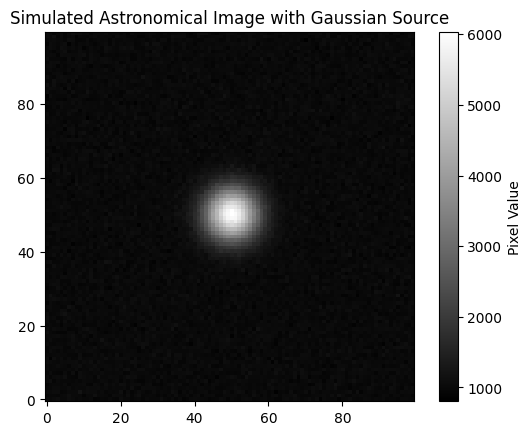

In [80]:
# Simulate an image with background noise
np.random.seed(42)  # for reproducibility
background = np.random.normal(loc=1000, scale=50, size=(100, 100))

# Create a Gaussian PSF centered at (50, 50)
y, x = np.indices((100, 100))  # create a coordinate grid
center_x, center_y = 50, 50
sigma = 5  # width of the PSF
amplitude = 5000  # peak brightness

psf = amplitude * np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * sigma**2))

# Add the source to the background
image = background + psf

# Visualize the image
plt.imshow(image, cmap='gray', origin='lower')
plt.colorbar(label='Pixel Value')
plt.title('Simulated Astronomical Image with Gaussian Source')

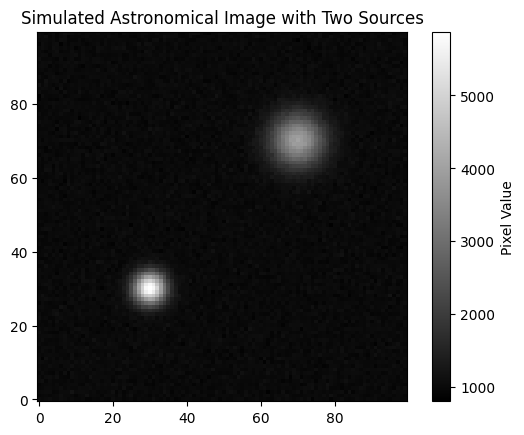

In [4]:
def create_double_source_image(size, centers, amplitudes, sigmas, noise_level=50):
    """
    Generate a simulated image with two Gaussian sources at given centers, amplitudes, and sigmas.
    The background should have Gaussian noise with mean 1000 and given noise_level.
    """


    # Initialize the background with Gaussian noise
    np.random.seed(42)
    background = np.random.normal(loc=1000, scale=noise_level, size=size)


    # Create a coordinate grid for the image
    y, x = np.indices(size)


    # Create the first source (Gaussian PSF)
    center_x1, center_y1 = centers[0]
    psf1 = amplitudes[0] * np.exp(-((x - center_x1)**2 + (y - center_y1)**2) / (2 * sigmas[0]**2))



    # Create the second source (Gaussian PSF)
    center_x2, center_y2 = centers[1]
    psf2 = amplitudes[1] * np.exp(-((x - center_x2)**2 + (y - center_y2)**2) / (2 * sigmas[1]**2))


     # Add both sources to the background
    image = background + psf1 + psf2
    
    return image



size = (100, 100)


centers = [(30, 30), (70,70)]
amplitudes = [5000, 3000]
sigmas = [3, 5]



# Generate the image with two sources
image = create_double_source_image(size, centers, amplitudes, sigmas, noise_level=50)

# Visualize the image
plt.imshow(image, cmap='gray', origin='lower')
plt.colorbar(label='Pixel Value')
plt.title('Simulated Astronomical Image with Two Sources')
plt.show()

🔵 Bonus Challenge: Allow the function to create N sources if a list of centers is given (not just 2).

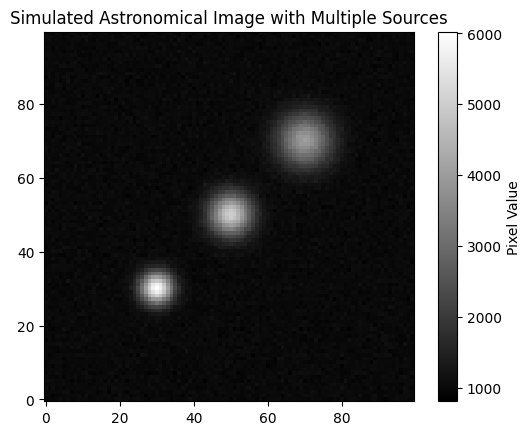

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def create_double_source_image(size, centers, amplitudes, sigmas, noise_level=50):
    """
    Generate a simulated image with multiple Gaussian sources at given centers, amplitudes, and sigmas.
    The background should have Gaussian noise with mean 1000 and given noise_level.
    """
    # Create a coordinate grid for the image
    y, x = np.indices(size)
    
    # Initialize the background with Gaussian noise
    np.random.seed(42)
    background = np.random.normal(loc=1000, scale=noise_level, size=size)
    
    # Loop over each source and add its Gaussian PSF to the image
    image = background
    for center, amplitude, sigma in zip(centers, amplitudes, sigmas):
        center_x, center_y = center
        psf = amplitude * np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * sigma**2))
        image += psf
    
    return image


size = (100, 100)

# List of centers for N sources
centers = [(30, 30), (70, 70), (50, 50)]  # 3 sources with different centers

# Corresponding amplitudes (brightness) for each source
amplitudes = [5000, 3000, 4000]

# Corresponding sigmas (PSF widths) for each source
sigmas = [3, 5, 4]

# Generate the image with multiple sources
image = create_double_source_image(size, centers, amplitudes, sigmas, noise_level=50)

# Visualize the image
plt.imshow(image, cmap='gray', origin='lower')
plt.colorbar(label='Pixel Value')
plt.title('Simulated Astronomical Image with Multiple Sources')
plt.show()


## Part 2: Analyze the Sources

### Exercise: Find Brightest Pixel and Measure Flux

Write two separate functions:

1. **`find_brightest_pixel(image)`**  
    → Returns the (x, y) location and value of the brightest pixel.

2. **`measure_flux(image, center, radius)`**  
    → Returns the total flux within a circular aperture of a given radius around a specified center.

---

**Hint:**  
You can define a circular aperture as the set of points satisfying:

$$(x - x_c)^2 + (y - y_c)^2 < r^2$$

where:
- $(x_c, y_c)$ are the center coordinates
- $r$ is the radius

---

**Instructions:**

- Find the brightest source using `find_brightest_pixel`.
- Measure the flux within a radius of **5 pixels** around the brightest source using `measure_flux`.
- **Comment:**  
  Does the measured flux capture most of the source light? Why or why not?

---


In [82]:
np.max(image)

5875.583632329351

In [15]:
index_max_value = np.argmax(image)
index_max_value

3030

In [61]:
image.shape

(100, 100)

In [16]:
np.unravel_index(index_max_value, image.shape)

(30, 30)

In [83]:
# Function to find the brightest pixel
def find_brightest_pixel(image):
    """Finds the brightest pixel in the image."""
    max_value = np.max(image)  # Find the maximum value in the image
    index_max_value = np.argmax(image)
    max_position = np.unravel_index(index_max_value, image.shape)  # Find the (x, y) coordinates of the max value
    return max_position, max_value



# Find the brightest pixel in the image
brightest_pixel, brightest_value = find_brightest_pixel(image)
print(f"Brightest pixel is at {brightest_pixel} with value {brightest_value}")


Brightest pixel is at (30, 30) with value 5875.583632329351


In [36]:
image.shape

(100, 100)

In [37]:
y, x = np.indices(image.shape) 
y

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]])

In [38]:
x

array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])

In [39]:
cx, cy = (30,30)

In [85]:
radius = 5
mask = (x - cx)**2 + (y - cy)**2 <= radius**2 
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
image[mask]

array([2270.44264773, 2281.65620751, 2623.81273798, 2920.50317158,
       3070.39022979, 2967.63705971, 2655.82955232, 2262.32647756,
       2297.33419566, 2906.47100163, 3391.23471461, 3844.50181192,
       4094.19702422, 3953.01781762, 3456.50296925, 2795.40648818,
       2346.11409947, 2708.30952482, 3425.25872577, 4253.474406  ,
       4769.00029097, 4918.49343524, 4741.10234258, 4284.04638058,
       3414.65927215, 2633.79574007, 2938.66636779, 3879.50276285,
       4866.23154486, 5523.46906835, 5773.25507416, 5451.41960777,
       4742.86360057, 3916.5321316 , 2988.28015957, 2227.33500513,
       3065.08264703, 4055.11423463, 4978.19667992, 5731.51939512,
       5875.58363233, 5696.88492392, 5026.36245021, 3983.53859685,
       3058.51066362, 2269.10466893, 2849.01001557, 3934.68221993,
       4790.9596682 , 5453.62192684, 5725.33563682, 5472.31805182,
       4700.76557681, 3943.51401506, 2946.54410156, 2603.62239073,
       3490.8398715 , 4244.86939235, 4785.37466602, 4982.79153

In [84]:
image.shape


(100, 100)

In [70]:
# Function to measure the flux within a circular aperture
def measure_flux(image, center, radius):
    """Measures the total flux inside a circular aperture around the center."""
    y, x = np.indices(image.shape)  # Create a grid of (y, x) coordinates
    cx, cy = center  # Get the center coordinates
    # Create a circular mask: True if the point is inside the circle
    mask = (x - cx)**2 + (y - cy)**2 <= radius**2 
    flux = np.sum(image[mask])  # Sum the pixel values inside the circle
    return flux


# Measure the flux within a 5-pixel radius around the brightest pixel
flux = measure_flux(image, brightest_pixel, radius=5)
print(f"Measured flux within a 5-pixel radius: {flux}")

Measured flux within a 5-pixel radius: 296414.79169898113


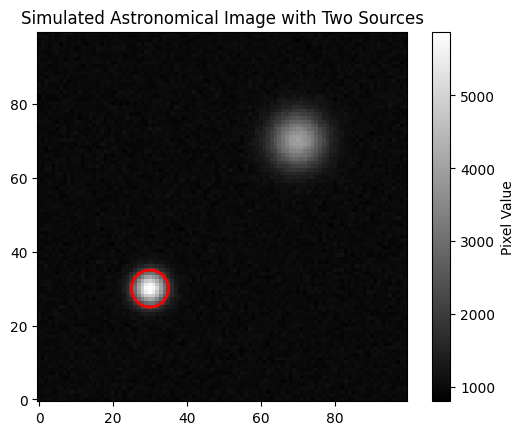

In [71]:

# Create the plot
fig, ax = plt.subplots()
cax = ax.imshow(image, cmap='gray', origin='lower')
plt.colorbar(cax, ax=ax, label='Pixel Value')  # Correct way to add colorbar

ax.set_title('Simulated Astronomical Image with Two Sources')

# Add a circle around the brightest pixel with a radius of 5 pixels
circle = plt.Circle((brightest_pixel[1], brightest_pixel[0]), 5, color='red', fill=False, linewidth=2)
ax.add_artist(circle)  # Use ax to add the circle


# Show the plot
plt.show()

## Part 3: Modify Your Functions

### Exercise: Background Subtraction for Flux Measurement

**Modify your `measure_flux` function** to:

- Subtract the background noise based on the **median value** of all the pixels in the image **before** measuring the flux.
- Then measure the total flux inside the aperture as before.

---

**Updated Task:**

- Find the brightest source using `find_brightest_pixel`.
- Subtract the background (median value) from the entire image.
- Measure the flux within the radius $r$ again.

---

**Question to Answer:**

- How much does background subtraction change your flux estimate?
- Why might background subtraction be important when measuring the flux of astronomical sources?

---

**Hint:**  
- You can compute the median background level with:

```python
background = np.median(image)


In [72]:
# Modified function to measure flux with background subtraction
def measure_flux_modified(image, center, radius):
    """Measures the total flux inside a circular aperture after background subtraction."""
    y, x = np.indices(image.shape)  # Create a grid of (y, x) coordinates
    cx, cy = center  # Get the center coordinates
    
    # Subtract the background (median value) from the image
    background = np.median(image)  # Median background level
    image_subtracted = image - background  # Subtract the background
    
    # Create a circular mask: True if the point is inside the circle
    mask = (x - cx)**2 + (y - cy)**2 <= radius**2
    
    # Measure the flux inside the aperture after background subtraction
    flux = np.sum(image_subtracted[mask])  # Sum the pixel values inside the circle
    return flux, background




In [73]:
# Measure the flux within a 5-pixel radius around the brightest pixel before background subtraction
flux_after_background_subtraction, background = measure_flux_modified(image, brightest_pixel, radius=5)
print(f"Background (median value): {background }")
print(f"Measured flux after background subtraction: {flux_after_background_subtraction}")

Background (median value): 1006.955042359347
Measured flux after background subtraction: 214851.4332678741


In [74]:
# Measure the flux within a 5-pixel radius around the brightest pixel
flux = measure_flux(image, brightest_pixel, radius=5)
print(f"Measured flux within a 5-pixel radius: {flux}")

Measured flux within a 5-pixel radius: 296414.79169898113


## Part 4: Light Curve Simulation

Requirements:

- Simulate 100 observations across the time span.
- Visualize the light curve.
- Overplot the "true" noiseless signal.

In [86]:
time_span_days =50
np.linspace(0, time_span_days, 100)

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

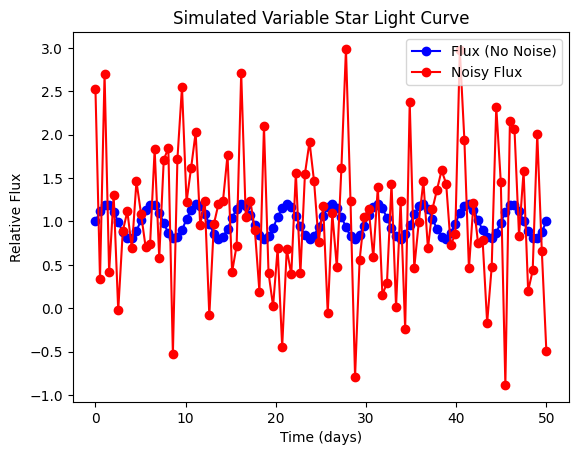

In [90]:
def simulate_variable_star(time_span_days, period_days, amplitude, noise_std):
    """
    Simulate a light curve of a variable star as a sine wave plus Gaussian noise.
    Returns both noisy and noiseless flux.
    """
    # Generate 100 time observations evenly spaced over the time span
    time = np.linspace(0, time_span_days, 100)
    
    # Create the true (noiseless) flux using a sine wave
    without_noise_flux = 1 + amplitude * np.sin(2 * np.pi * time / period_days)
    
    # Add Gaussian noise to the true flux to simulate observed flux
    noise = np.random.normal(0, noise_std, size=time.shape)
    noisy_flux = without_noise_flux + noise
    
    return time, without_noise_flux, noisy_flux


time_span_days = 50  # Total observation time in days
period_days = 5  # Period of the variable star in days
amplitude = 0.2  # Amplitude of the variability
noise_std = 0.8  # Standard deviation of the Gaussian noise

# Simulate the light curve
time, without_noise_flux, noisy_flux = simulate_variable_star(time_span_days, period_days, amplitude, noise_std)

# Plot both the without_noise_flux and noisy flux
plt.plot(time, without_noise_flux, marker='o', label='Flux (No Noise)', color='blue')
plt.plot(time, noisy_flux, marker='o', linestyle='-', label='Noisy Flux', color='red')
plt.xlabel('Time (days)')
plt.ylabel('Relative Flux')
plt.title('Simulated Variable Star Light Curve')
plt.legend()
plt.show()

## Part 5: Make your module

### - Create a module for your functions and import that into your notebook.
### - Use functions in your module in your notebook.
### - Submit your module .py file along with your notebook.

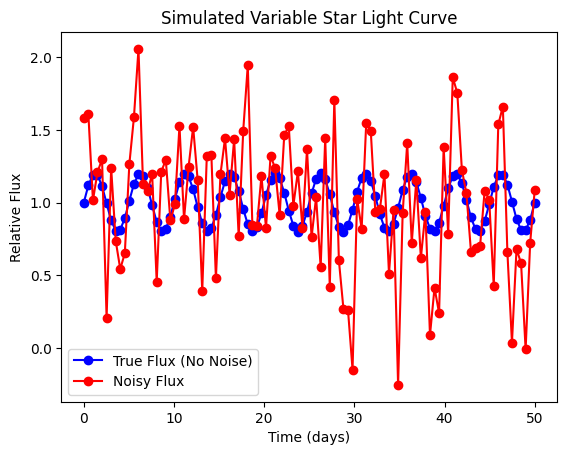

In [2]:
from module_HW3 import *

time_span_days = 50  # Total observation time in days
period_days = 5  # Period of the variable star in days
amplitude = 0.2  # Amplitude of the variability
noise_std = 0.5  # Standard deviation of the Gaussian noise

# Simulate the light curve
time, true_flux, noisy_flux = simulate_variable_star(time_span_days, period_days, amplitude, noise_std)

# Plot both the true flux and noisy flux
plt.plot(time, true_flux, marker='o', label='True Flux (No Noise)', color='blue')
plt.plot(time, noisy_flux, marker='o', linestyle='-', label='Noisy Flux', color='red')
plt.xlabel('Time (days)')
plt.ylabel('Relative Flux')
plt.title('Simulated Variable Star Light Curve')
plt.legend()
plt.show()


In [5]:
# Find the brightest pixel in the image
brightest_pixel, brightest_value = find_brightest_pixel(image)
print(f"Brightest pixel is at {brightest_pixel} with value {brightest_value}")

Brightest pixel is at (30, 30) with value 5875.583632329351


In [6]:
flux_after_background_subtraction, background = measure_flux_modified(image, brightest_pixel, radius=5)
print(f"Background (median value): {background }")
print(f"Measured flux after background subtraction: {flux_after_background_subtraction}")

Background (median value): 1006.955042359347
Measured flux after background subtraction: 214851.4332678741
